In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# !git clone https://github.com/zalandoresearch/fashion-mnist.git

fatal: destination path 'fashion-mnist' already exists and is not an empty directory.


In [3]:
from tensorflow.keras.datasets import fashion_mnist

# 장수가 너무 많음 보통 메모리에 60000장 다올라와있는데 보통은 빅데이터는 조금씩 올린다. 순차적으로 하드디스크에서 메모리로올린다.
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [4]:
# import os
# import struct
# import sys

# from array import array
# from os import path
# import png

In [5]:
type(X_test)

numpy.ndarray

In [6]:
class_name = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','AnkleBoot']

### 시각화

In [7]:
# 시각화

samples = np.random.randint(60000,size=9)
samples

array([ 8432,  7010, 51548, 37328, 50314, 36744, 43012, 44723, 22423])

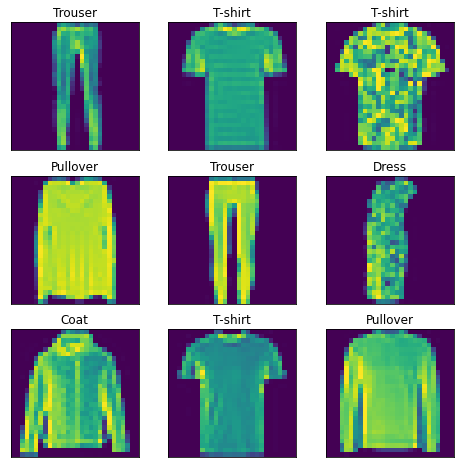

In [8]:
plt.figure(figsize=(8,8))
for i,idx in enumerate(samples):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[idx])
  plt.xticks([])
  plt.yticks([])
  plt.title(class_name[y_train[idx]])
plt.show()

### validation data

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.3)

print(X_train.shape,X_val.shape)
print(y_train.shape,y_val.shape)

(42000, 28, 28) (18000, 28, 28)
(42000,) (18000,)


### 정규화

In [10]:
# normalization 보통 이미지는 최소-최대 정규화를 사용한다.
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [11]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [12]:
y_train[:10]

array([9, 1, 4, 5, 1, 3, 2, 3, 0, 0], dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

In [14]:
y_train_oh

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### 모델

In [16]:
# 42000 배치 사이즈 이차원 데이터 
X_train.shape
# 이미지를 쭉 펴달라는 소리이다. 펴야 가능
X_train = X_train.reshape(-1,28*28)
X_val = X_val.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)
X_train.shape


(42000, 784)

In [17]:
model = keras.Sequential([
    layers.Dense(256,activation='relu',input_shape=(784,)),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [19]:
%%time
# learning
EPOCHS = 50
BATCH_SIZE = 32
# 1 iteration = batch_size 이다. 60000장이니까 한번 배치사이즈만큼 돌려서 train_data를 모두 다 소진하면 1 epoch 이고
# 60000/32 가 1 iteration의 개수이다. 

log = model.fit(X_train,y_train_oh,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                validation_data=(X_val,y_val_oh))

Epoch 1/50
1313/1313 [==============================] - 10s 7ms/step - loss: 0.5377 - acc: 0.8095 - val_loss: 0.4240 - val_acc: 0.8458
Epoch 2/50
1313/1313 [==============================] - 10s 7ms/step - loss: 0.3868 - acc: 0.8591 - val_loss: 0.3726 - val_acc: 0.8664
Epoch 3/50
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3498 - acc: 0.8701 - val_loss: 0.3429 - val_acc: 0.8778
Epoch 4/50
1313/1313 [==============================] - 10s 7ms/step - loss: 0.3217 - acc: 0.8801 - val_loss: 0.3342 - val_acc: 0.8792
Epoch 5/50
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3014 - acc: 0.8876 - val_loss: 0.3599 - val_acc: 0.8709
Epoch 6/50
1313/1313 [==============================] - 10s 7ms/step - loss: 0.2903 - acc: 0.8903 - val_loss: 0.3445 - val_acc: 0.8729
Epoch 7/50
1313/1313 [==============================] - 10s 8ms/step - loss: 0.2706 - acc: 0.8976 - val_loss: 0.3527 - val_acc: 0.8739
Epoch 8/50
1313/1313 [==============================] - 1

In [20]:
## 시각화

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

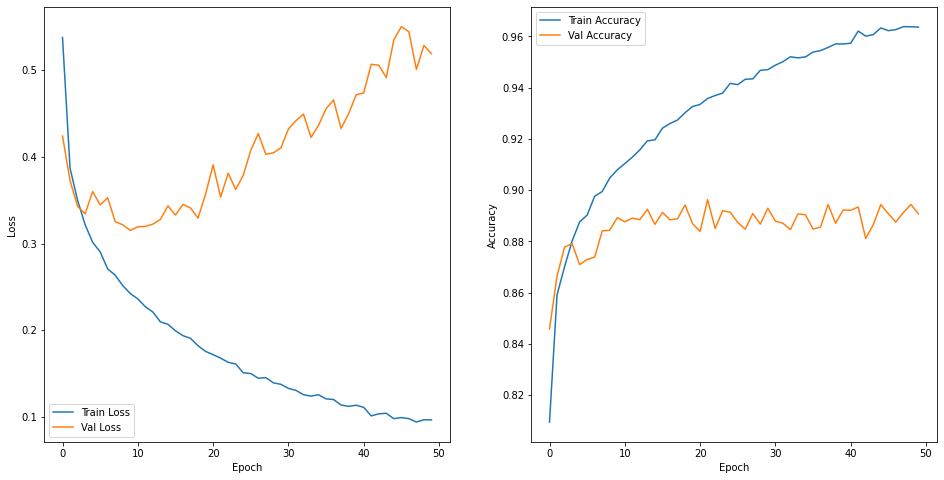

In [21]:
plot_history(log)

In [22]:
model.evaluate(X_train,y_train_oh)

1313/1313 [==============================] - 4s 3ms/step - loss: 0.0849 - acc: 0.9686


[0.08491562306880951, 0.9686428308486938]

In [23]:
model.evaluate(X_test,y_test_oh)

313/313 [==============================] - 1s 4ms/step - loss: 0.5772 - acc: 0.8835


[0.5771963596343994, 0.8834999799728394]

In [24]:
# 예측
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[2.18794565e-08, 2.23629073e-17, 1.14988715e-12, 6.27612323e-15,
        5.97027906e-18, 1.02312026e-06, 1.63921612e-10, 7.86356486e-06,
        6.49527036e-13, 9.99991000e-01],
       [1.14381124e-04, 7.26446609e-19, 9.99880731e-01, 3.71697517e-09,
        1.78116878e-07, 3.44898554e-26, 4.63267861e-06, 1.51256165e-25,
        1.92788873e-13, 1.09940351e-37],
       [1.71295798e-18, 9.99999940e-01, 1.05335228e-25, 1.56966587e-15,
        1.30447564e-21, 1.33566540e-28, 7.28863411e-12, 0.00000000e+00,
        1.49458267e-24, 0.00000000e+00],
       [1.23647639e-21, 9.99999940e-01, 9.52035206e-25, 4.17611648e-16,
        2.80425032e-21, 6.86509429e-28, 2.11429641e-11, 0.00000000e+00,
        1.49033129e-22, 0.00000000e+00],
       [8.82144392e-01, 1.11671020e-11, 7.46657199e-04, 7.59439445e-06,
        3.00451326e-08, 3.15077337e-13, 1.17101319e-01, 3.81183054e-14,
        2.15521752e-08, 4.42639700e-19]], dtype=float32)

In [25]:
# 가장큰 값의 인덱스를 반환한다.
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

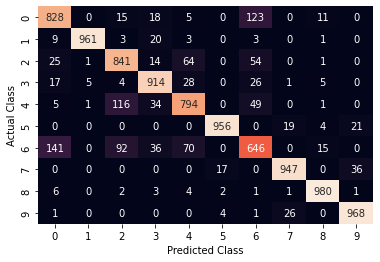

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cbar=False,fmt='d')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [46]:
# 오답 이미지를 시각화

samples = np.where((y_test == y_pred) == False)[0]
samples
samples = np.random.choice(samples,9)
X_test = X_test.reshape(-1,28,28)

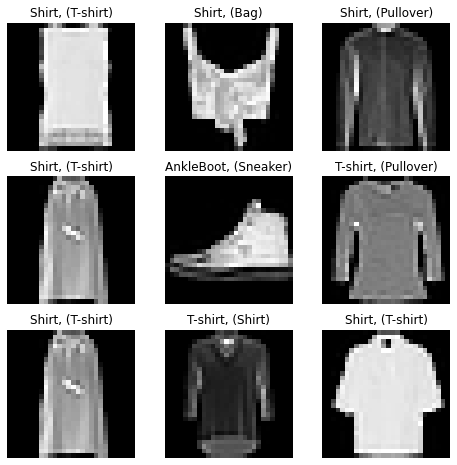

In [49]:
plt.figure(figsize=(8,8))
for i,idx in enumerate(samples):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[idx],cmap='gray')
  plt.axis('off')
  plt.title(f'{class_name[y_test[idx]]}, ({class_name[y_pred[idx]]})')
plt.show()